In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('./datasett_oppgave2.csv')

label_encoder = LabelEncoder()

# Automatically transform all categorical columns to numerical values
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['exang'] = label_encoder.fit_transform(df['exang'])

<Figure size 640x480 with 0 Axes>

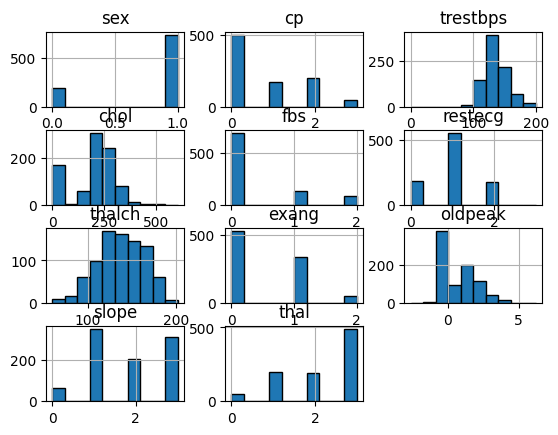

In [11]:
# List of columns to exclude
columns_to_exclude = ['id', 'ca', 'age','num','dataset']

# Select only the columns that are not in the exclusion list
columns_to_include = [col for col in df.columns if col not in columns_to_exclude]

rename_dict = {
    'old_column_name1': 'New Column Name 1',
    'old_column_name2': 'New Column Name 2',
    # Add more column renames as needed
}

# Rename the columns
df_renamed = df[columns_to_include].rename(columns=rename_dict)

# Create histograms of all columns
plt.figure()
df[columns_to_include].hist(bins=10, edgecolor='black')
plt.show()

In [20]:
import plotly.express as px
import numpy as np

#Drope id
df_no_id = df.drop('id', axis=1)

# Calculate the correlation matrix
corr_matrix = df_no_id.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix_masked = corr_matrix.mask(mask)

# Create a heatmap of the correlation matrix using plotly
fig = px.imshow(corr_matrix_masked, 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='RdBu_r', 
                title='Correlation Matrix Heatmap')

# Show the plot
fig.show()
